# Содержание
1. [Вероятностные распределения](#paragraph1)
    1. [Геометрическое распределение](#subparagraph1)
    2. [Распределение Максвелла](#subparagraph2)

# Вероятностные распределения <a name="paragraph1"></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import scipy.stats as sts
from scipy.stats import geom
#from random import random
#from collections import Counter
#import copy
#import math
#from math import *
from random import *
import pandas as pd
#import calendar
#import statsmodels.api as sm

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

# 1.1 Геометрическое распределение <a name="subparagraph1"></a>

## 1.1.1. Описание основных характеристик распределения

Функция вероятности дискретного распределения: $P_\xi(x) = pq^x, x \in \{0,1,2,...\}$  
Математическое ожидание:  
$$M\xi=\sum_{k=1}^{\infty}kpq^{k-1}=p\sum_{k=1}^{\infty}kq^{k-1}=p\sum_{k=1}^{\infty}\frac{dq^k}{dq}=p\frac{d}{dq}(\sum_{k=1}^{\infty}q^k)=p\frac{d}{dq}(\frac{q}{1-q})=p\frac{1}{(1-q)^2}=\frac{1}{p}$$
Дисперсия:  
$$D\xi=M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-M\xi^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-\xi)$$
$$M(\xi(\xi-1))=p\sum_{k=1}^{\infty}k^2q^{k-1}=pq\sum_{k=0}^{\infty}\frac{d^2q^k}{dq^2}=pq\frac{d^2}{dq^2}(\sum_{k=0}^{\infty}q^k)=pq\frac{d^2}{dq^2}(\frac{1}{1-q})=pq\frac{2}{(1-q)^3}=\frac{2q}{p^2}$$
$$D\xi = M\xi^2+M\xi-(M\xi)^2=\frac{2q}{p^2}+\frac{1}{p}-\frac{1}{p^2}=\frac{2q-1}{p^2}+\frac{1}{p}=\frac{2q-1+p}{p^2}=\frac{2q-1+1-q}{p^2}=\frac{q}{p^2}$$

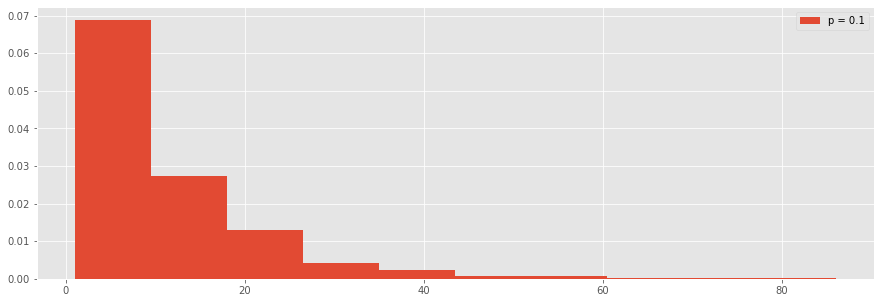

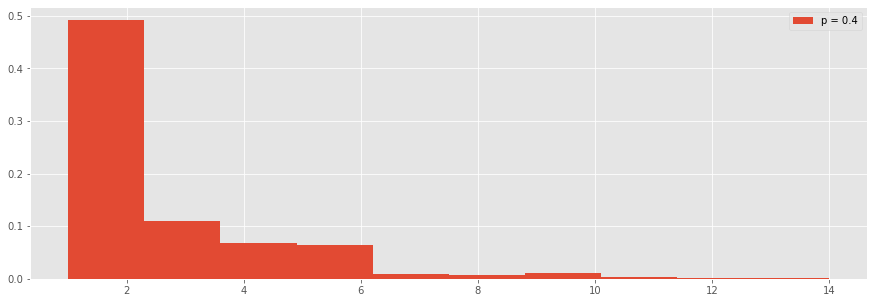

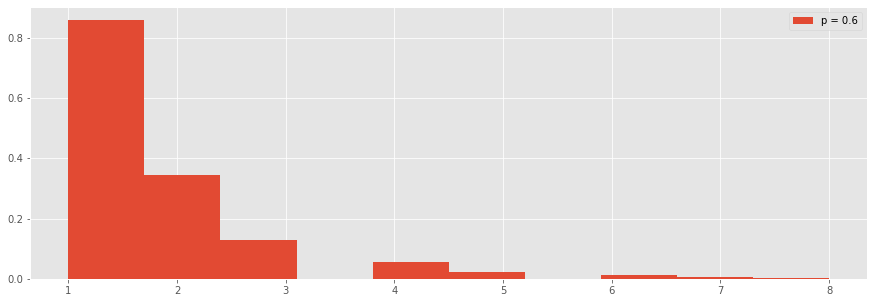

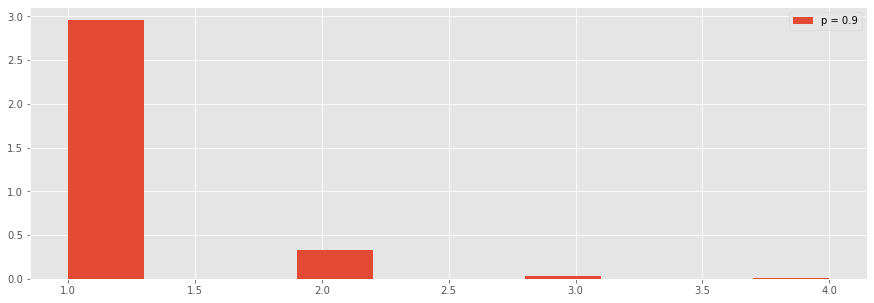

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [3]:
for p in [0.1, 0.4, 0.6, 0.9]:
    geom_rv = sts.geom(p)
    sample = geom_rv.rvs(1000)
    plt.hist(sample, density = True, label='p = {}'.format(p))
    plt.legend()
    plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Мода $M_0$ - значение во множестве наблюдений, которое встречается наиболее часто, для дискретной случайной величины определяется с помощью гистограммы вероятностей.  
Из гистограмм видно, что $M_0 = 1$

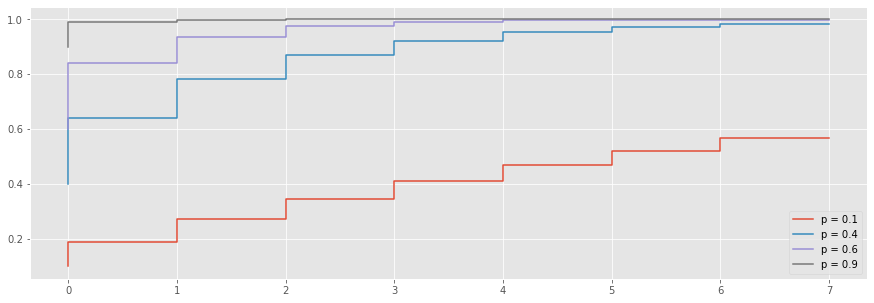

Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения


In [4]:
for p in [0.1, 0.4, 0.6, 0.9]:
    n = np.arange(0, 8, 1)
    plt.step(n, 1-(1-p)**(n+1), label='p = {}'.format(p))
    plt.legend()
plt.show()
print('Рис. 1: 1.1.1, Гистограмма вероятностей дискретного распределения')

Медиана Ме находится из уравнения $P_\xi(x)=0.5$  
$\begin{cases}
    p+qp+q^2p+...+q^{Me-1}p \geq \frac{1}{2}\\
    q^{Me-1}p+q^{Me}p+q^{Me+1}p+... \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    p \frac{1-q^{Me}}{1-q} \geq \frac{1}{2}\\
    q^{Me-1}p\frac{1}{1-q} \geq \frac{1}{2}
  \end{cases}$  
$\begin{cases}
    1-q^{Me} \geq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    q^{Me} \leq 2^{-1}\\
    q^{Me-1} \geq 2^{-1}
  \end{cases}$  
$\begin{cases}
    Me \cdot log_2q \leq -1\\
    (Me-1)log_2q \geq -1
  \end{cases}$   
Отсюда $-\frac{1}{log_2q} \leq Me \leq 1-\frac{1}{log_2q}$

### Примеры событий, которые могут быть описаны выбранными случайными величинами

Типичные интерпретации геометрического распределения: описывает количество испытаний n до первого успеха при вероятности наступления успеха в каждом испытании p. Если n подразумевается номер испытания, в котором наступил успех, то геометрическое распределение будет описываться следующей формулой:
$$Geom_p(n)=q^{n-1}p$$
Геометрическое распределение считается дискретной версией экспоненциального распределения.  
Предположим, что эксперименты Бернулли проводятся через равные промежутки времени. Тогда геометрическая случайная величина Х - это время, измеренное в дискретных единицах, которое проходит до того, как мы добьемся первого успеха. . Но если мы хотим смоделироватьвремя, прошедшее до того, как данное событие произойдет в непрерывном времени, то подходящим распределением для использования будетэкспоненциальное распределение. С математической точки зрения геометрическое распределение обладает тем же свойством без памяти,которым обладает экспоненциальное распределение: в экспоненциальном случае вероятность того, что событие произойдет в течениезаданного временного интервала, не зависит от того, сколько времени уже прошло, а событие не произошло; в геометрическом случаевероятность того, что событие произойдет в данный момент (дискретное) времени, не зависит от того, что произошло раньше, потому чтоэксперимент Бернулли, проведенный в каждый момент времени, не зависит от предыдущих испытаний.Геометрическое распределение полезно для определения вероятности успеха при ограниченном количестве испытаний, что очень применимо креальному миру, в котором неограниченные испытания редки. Поэтому неудивительно, что различные сценарии хорошо моделируютсягеометрическими распределениями:
 - В спорте, особенно в бейсболе, геометрическое распределение полезно для анализа вероятности того, что отбивающий получит удар,прежде чем он получит три удара; здесь цель - добиться успеха за 3 испытания.
 - При анализе затрат и выгод, например, когда компания решает, финансировать ли исследовательские испытания, которые в случае успеха принесут компании некоторую предполагаемую прибыль, цель состоит в том, чтобы достичь успеха до того, как затраты превысят потенциальную выгоду.
 - В тайм-менеджменте цель состоит в том, чтобы выполнить задачу за установленный промежуток времени.Другие приложения, подобные вышеупомянутым, также легко создаются. Фактически, геометрическое распределение применяется наинтуитивном уровне в повседневной жизни на регулярной основе. 

## 1.1.3  Описание способа моделирования выбранных случайных величин

Существует такой способ реализации метода обратных функций, при котором трудоемкость по крайней мере формально не зависит от p. Действительно, накопленная вероятность $s_{n+1} = p_0+ ... +p_n$ для геометрического распределения имеет вид  
$$s_{n+1} = \sum_{i = 0}^{n} p(1-p)^i = 1 - (1-p)^{n+1}$$
Поэтому событие $\{\xi = n\}$ приобретает вид  
$$\{\xi = n\} = \{s_n < \alpha \leq s_{n+1}\} = \{1 - (1-p)^n < \alpha \leq 1 - (1-p)^{n+1}\} = \{(1-p)^{n+1} \leq 1 - \alpha < (1 - p)^n\} = \{(n+1)ln(1-p) \leq ln(1-\alpha) < n \cdot ln(1-p)\} = \{n < \frac{ln(1-\alpha)}{ln(1-p)} \leq n+1\},$$  
и тем самым 
$$\xi = [\frac{ln(1-\alpha)}{ln(1-p)}]$$
Эту же формулу можно получить по-другому. Пусть $\nu$ - случайная величина, имеющая показательное распределение с параметром $\lambda$ и $\xi = [n]$. Тогда при $n \geq 0$
$$P(\xi = n) = P(n \leq \nu < n+1) = e^{-n\lambda} - e^{-(n+1)\lambda} = (1-e^{-\lambda})e^{-n\lambda}.$$
Поскольку случайная величина $\frac{-ln(1-\alpha)}{\lambda}$ имеет показательное распределение с параметров $\lambda$, то взяв $\lambda = -ln(1-p)$, приходим к формуле $\xi = [\frac{ln(1-\alpha}{ln(1-p)}]$  

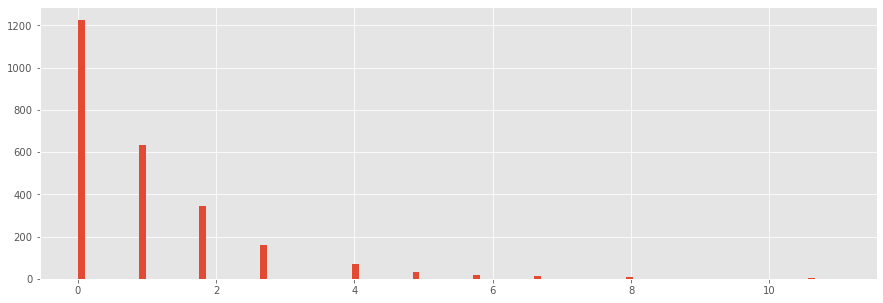

In [7]:
def sample_(N=2500, scale = 0.5):
    for x in range(N):
        je = np.log(random())//np.log(1-scale)#Генерирование случайных чисел по формуле из справочника
    return je
def Geom(n, p=0.5):
    x=[sample_(scale=p) for x in range(n)]
    #print(x)
    return x
plt.hist(Geom(2500,0.5),25, width = 0.1)
plt.show()

# 1.2 Распределение Максвелла <a name="subparagraph2"></a>

## 1.2.1. Описание основных характеристик распределения

Математическое ожидание:
$$M\xi = \int_0^{\infty}x\sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}dx=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty}x^3e^{\frac{-x^2}{2\lambda^2}}dx=2\lambda^4\cdot \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}=2\lambda \sqrt{\frac{2}{\pi}}$$
Дисперсия:
$$D\xi = M(\xi-M\xi)^2=M\xi^2-(M\xi)^2=M(\xi(\xi-1)+\xi)-(M\xi)^2=M(\xi(\xi-1))+M\xi-(M\xi)^2=M(\xi(\xi-1))+M\xi(1-(M\xi))$$
$$M(\xi(\xi-1))=\int_0^{\infty} x^2f(x)dx = \int_0^{\infty} x^2 \sqrt{\frac{2}{\pi}}\frac{x^2}{\lambda^3}e^{-\frac{x^2}{2\lambda^2}}=\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}\int_0^{\infty} x^4 e^{-\frac{x^2}{2\lambda^2}} = \sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3} \cdot 3\lambda^5 \sqrt{\frac{\pi}{2}}=3\lambda^2$$
$$D\xi=M\xi^2-(M\xi)^2=3\lambda^2-4\lambda^2\cdot \frac{2}{\pi}=\frac{3\pi-8}{\pi}\lambda^2$$
Также использовались известные интегралы, который был взят из курса физики:  
$$\int_0^{\infty} x^3 e^{-x^2/2 \lambda^2} dx = \frac {1}{2 (\frac{1}{\lambda^2})^2} \cdot 4 = 2 \lambda^4$$
$$\int_0^{\infty} x^4 e^{-x^2/2 \lambda^2} dx = \frac {3}{8}\sqrt{\pi} (\frac{1}{2\lambda^2})^{-\frac{5}{2}} = 3\lambda^5 \sqrt{\frac{\pi}{2}}$$

Рис.4: График функции распределения


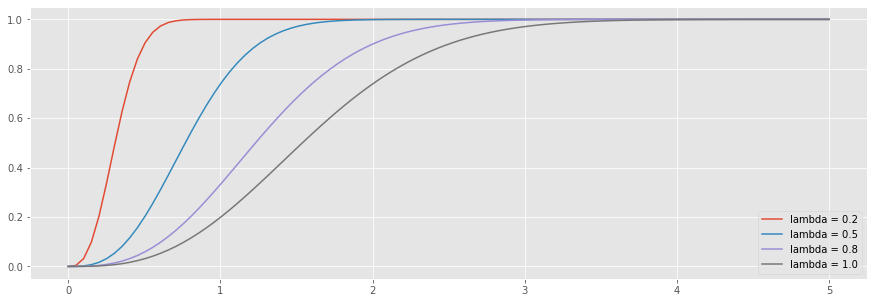

In [8]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    cdf = maxwell_rv.cdf(x)
    plt.plot(x, cdf, label = 'lambda = {}'.format(lambd))
    plt.legend()
print('Рис.4: График функции распределения')



Рис.5: График плотности вероятности распределения


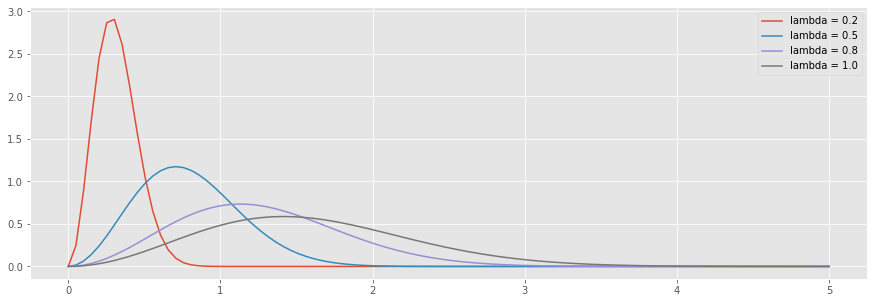

In [9]:
for lambd in [0.2,0.5,0.8,1.0]:
    maxwell_rv = sts.maxwell(scale = lambd)
    x = np.linspace(0,5,100)
    pdf = maxwell_rv.pdf(x)
    k = max(pdf)
    plt.plot(x, pdf, label ='lambda = {}'.format(lambd))
    plt.legend()
print('\n')
print('Рис.5: График плотности вероятности распределения')

Модой абсолютно непрерывного распределения называют любую точку локального максимума плотности распределения.
$f'(x) = \sqrt{\frac{2}{\pi}} \frac{x^2}{\lambda^3} e^{-\frac{x^2}{2\lambda^2}} = \frac{4x}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} - \frac{2x^2}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} \frac{x}{\lambda^2} = 0$  
$\frac{4x}{\lambda^3 \sqrt{2\pi}} e^{-\frac{x^2}{2\lambda^2}} = \frac{2x^2}{\lambda^3 \sqrt{2\pi}}e^{-\frac{x^2}{2\lambda^2}} \frac{x}{\lambda^2}$  
$4 = 2x \frac{x}{\lambda^2}$   
$x^2 = 2\lambda^2$  
$x = M_0= \lambda \sqrt{2}$ 

Медиана  
$\int_0^{Me}\sqrt{\frac{2}{\pi}}\frac{1}{\lambda^3}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{1}{2}$  
$\int_0^{Me}x^2 e^{-\frac{-x^2}{2\lambda^2}}dx = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$(-\lambda^2e^{-\frac{x^2}{2\lambda^2}}x+\lambda^3\sqrt{\frac{\pi}{2}})|_0^{Me} = \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$-Me\lambda^2e^{\frac{-Me^2}{2\lambda^2}}=- \frac{\lambda^3}{2}\sqrt{\frac{\pi}{2}}$  
$Me \cdot e^{\frac{-Me^2}{2\lambda^2}} = \frac{\lambda^2}{2}\sqrt{\frac{\pi}{2}}$  
$Me \approx 1,5383\lambda$

## 1.2.2. Примеры событий, которые могут быть описаны выбранными случайными величинами

Впервые распределение было определено и использовалось для описания скоростей частиц в идеализированных газах, где частицы свободноперемещаются внутри стационарного контейнера, не взаимодействуя друг с другом, за исключением очень коротких столкновений, в которыхони обмениваются энергией и импульсом друг с другом или со своим тепловым окружением. Термин «частица» в этом контексте относится только к газообразным частицам (атомам или молекулам), и предполагается, что система частиц достигла термодинамического равновесия.Энергии таких частиц следуют так называемой статистике Максвелла – Больцмана, а статистическое распределение скоростей выводится путем приравнивания энергии частиц к кинетической энергии.Распределение Максвелла – Больцмана в основном применяется к скоростям частиц в трех измерениях, но оказывается, что оно зависит только от скорости (величины скорости) частиц. Распределение вероятности скорости частицы указывает, какие скорости более вероятны: частица будет иметь скорость, выбранную случайным образом из распределения, и с большей вероятностью будет находиться в одном диапазоне скоростей, чем в другом.  
При тепловом равновесии (T=const) $u_{кв}$ молекул газа остается постоянной и равной $u=\sqrt{\frac{3kT}{m}}$  
Это объясняется тем, что в газе устанавливается стационарное статическое распределение молекул по значениям скоростей, называемое распределением Максвелла:  
$f(u)=\frac{dN(u)}{Ndu}=4\pi(\frac{m}{2\pi kT})^{\frac{3}{2}}\cdot u^2 \cdot e^{-\frac{mu^2}{2kT}}$  
В теории вероятностей рассматривается распределения Максвелла, в котором $x=u$ и $\frac{1}{\lambda^2}=\frac{m}{kT}$  
Нетипичной интерпретацией распределения Максвелла будут данные, которые представляют время ремиссии (в месяцах)  у пациентов с раком мочевого пузыря и первоначально использовались Lee и Wang.  
Ремиссия (лат. remissio «уменьшение, ослабление») — период течения хронической болезни, который проявляется значительным ослаблением (неполная ремиссия) или исчезновением (полная ремиссия) её симптомов (признаков заболевания)

## 1.2.3. Описание способа моделирования выбранных случайных величин

$\textbf{Способ 1:}$
Существует полярный метод (группа полярных методов предназначена для моделирования распределений, так или иначе связанных с двумерными распределениями, инвариантными относительно вращений), где моделируются две независимые случайные величины $\xi_1, \xi_2$ , каждая из которых имеет распределение N(0,1).   
Полярные координаты. Каждая точка $X = (x, y) T ∈ R^2 \backslash \{0\}$ может быть однозначно представлена в виде $X = ||X|| \overline e$, где $\overline e = 1$. Полагая $s = ||X||$ и $\overline e = (\cos t,\sin t)^T , где t \in [0, 2\pi)$, получаем биекцию $\phi : (x, y)^T \rightarrow (s, t)^T$ , действующую из $R^2 \backslash \{0\}$ в $(0,\infty)×[0, 2\pi)$. Конечно, переменные (s, t) являются полярными координатами вектора X, а обратное отображение $\psi : (0, \infty)×[0, 2\pi) \rightarrow R^2 \backslash \{0\}$ имеет вид $x = s \cos t, y = s \sin t$ с якобианом $det \psi' (s, t) = s.$  
Если теперь рассмотреть случайный вектор $\overline \xi \in R^2$ с плотностью распределения $p_\xi(x, y)$ и обозначить r, $\varphi$ (случайные) полярные координаты этого вектора, то, так как в этом случае n = 1, мы
получим из (7.1.1), что 
$$p_{r,\varphi} (s, t) = sp_\xi(s \cos t, s \sin t)1_{(0,\infty)×[0,2\pi)} (s, t).(1.2.3.1)$$ 
Выражение (1.2.3.1) выглядит особенно просто, если существует такая функция $f : (0, \infty) \rightarrow (0, \infty), что p_\xi (x, y) = f(\sqrt{x^2 + y^2}).$ В этом случае, очевидно,
$$p_{r,\varphi}(s, t) = sf(s)I_{(0,\infty)×[0,2\pi)} (s, t) = 2πsf(s)I_{(0,\infty)}(s)\frac{1}{2\pi}I_{[0,2π)}(t).(1.2.3.2)$$
Это значит, что случайные величины r и $\varphi$ независимы, $\varphi ∈ U(0, 2\pi)$, а r имеет плотность распределения $p_r(s) = 2\pi sf(s), s > 0$  
Действительно, поскольку совместная плотность распределения $\xi_1, \xi_2$ имеет вид
$$p(x,y) = \frac{1}{2\pi} e^{-\frac{x^2+y^2}{2}}, x,y \in R,$$
то, как следовательно из вышенаписанного, полярный радиус r и полярный угол $\varphi$ случайного
вектора ($\xi_1, \xi_2$) независимы, причем полярный угол равномерно распределен на $[0, 2π)$, а полярный радиус имеет распределение Рэлея ($p(x) = xe^{\frac{−x^2}{2}}$
, x > 0.).  
Отсюда, применяя моделирующую формулу ($\xi = \sqrt{−2ln(α)}$), сразу же приходим к представлению  
$$\xi_1 = \sqrt{-2ln(\alpha_1)}\cos{(2\pi \alpha_2)},$$
$$\xi_2 = \sqrt{-2ln(\alpha_1)}\sin{(2\pi \alpha_2)},$$
где $\alpha_1, \alpha_2 \in$ U(0, 1)  
В итоге получаем следующий алгоритм:

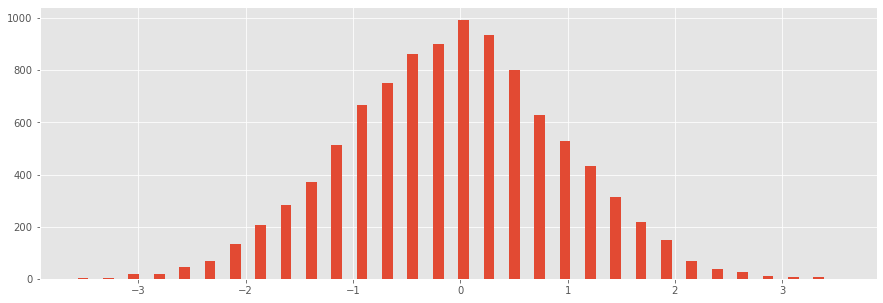

In [10]:
%matplotlib inline
import random
import pandas as pd
import math
from scipy import stats
import sys
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
N=10000
random.seed(123)
epsilon = sys.float_info.epsilon

def box_muller():
    u1, u2 = 0.0, 0.0
    while u1 < epsilon or u2 < epsilon:
        u1 = random.random()
        u2 = random.random()
        
    n1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    n2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
    return n1, n2

# Use KS to test
samples = [box_muller()[0] for x in range(N)]
test_stat, pvalue = stats.kstest(samples, 'norm', args=(0, 1), N=N)

# Plot our samples against our reference distribution
plt.hist(samples, 30, width = 0.1)
plt.show()

Стоит заметить, что данный способ достаточно быстр.  
Я бы ещё подметил тот факт, что распределение Максвелла с параметром $\lambda = 1$ очень схоже с N(0,1):
$$f(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}}x^2  - Максвелла$$
$$f(x) = \sqrt{\frac{2}{\pi}}e^{-\frac{x^2}{2}}\cdot \frac{1}{2} - N(0,1)$$

$\textbf{Способ 2:}$
По определению, случайный вектор $\overline \xi= (\xi_1, \xi_2 )^T$ равномерно распределен на единичной окружности $S^1$ с центром в нуле, если $\xi_1^2 + \xi_2^2 = 1$ с вероятностью 1 и если полярный угол $\varphi$ вектора $\overline \xi$ равномерно распределен на $[0, 2π).$  
Из этого определения сразу же следует моделирующая формула для равномерного распределения на $S^1$:
$$\xi_1 = \cos (2\pi \alpha)$$
$$\xi_2 = \sin (2\pi \alpha) (1.2.3.3)$$
Вычисление двух тригонометрических функций, однако, может оказаться трудоемкой операцией. Стандартной альтернативой формуле (1.2.3.3) является использование метода отбора для моделирования равномерного распределения в единичном круге $B_1(0) = \{(x, y) : x^2 + y^2 < 1\}$ с центром в нуле с последующей нормировкой результата. Формальное обоснование этой процедуры представим ниже.    
Аналогично полярным координатам на плоскости, каждый ненулевой вектор $X = (x, y, z)^T \in R^3$ может быть однозначно представлен в виде $X = ||X||\overline e$, где 
$$\overline e = (\cos(t) \cos(u), \sin(t) \cos(u), \sin(u))^T, t \in [0, 2\pi), u \in [−\pi/2, \pi/2].$$
Это, конечно, соответствует переходу от евклидовой системы координат (x, y, z) к сферической системе (s, t, u) со сферическим радиусом $s = ||X||$, долготой s и широтой u. Хорошо известно, что якобиан обратного отображения равен $s^2\cos(u)$.  
Поэтому, если случайный вектор $\overline \xi = (\xi_1, \xi_2, \xi_3)^T$ имеет плотность распределения $p_\xi(x, y, z)$, то сферические координаты $r, \varphi, \theta$ этого вектора имеют совместную плотность 
$$p r,\varphi, \theta(s, t, u) = p_\xi(s \cos(t) \cos(u), s \sin(t) \cos(u), s \sin(u)) s^2 \cos(u), (1.2.3.4)$$
сосредоточенную в области $(0, \infty) × [0, 2\pi) × (−\pi/2, \pi/2)$. В случае, когда
$$p_\xi(x, y, z) = f(\sqrt{x^2 + y^2 + z^2}), (1.2.3.5)$$
равенство (1.2.3.4) приобретает вид
$$p_{r,\varphi,\theta} (s, t, u) = 4\pi s^2 f(s^2)I_{(0,\infty)}(s)\frac{1}{2\pi} I_{(0,2\pi)}\frac{\cos(u)}{2}I_{(-\frac{\pi}{2},\frac{\pi}{2})}.$$
Таким образом, случайные величины $r, \varphi$ и $\theta$ оказываются независимыми, причем долгота $\varphi$ равномерно распределена на $(0, 2\pi)$, плотность $p_r(s)$ распределения r равна $4\pi s^2 f(s^2)$, а плотность $p_\theta(u)$ распределения широты $\theta$ сосредоточена на $(−\frac{\pi}{2}, \frac{\pi}{2})$ и равна на этом интервале $0.5 \cos(u)$.  
Например, если $\overline \xi = (\xi^1, \xi^2, \xi^3)^T$ — случайный вектор с независимыми N(0, 1)-распределенными координатами, то его плотность распределения равна $(2\pi)^{−\frac{3}{2}} e^{−\frac{x^2 + y^2 + z^2}{2}}$, и длина $r = ||\overline \xi||$ этого вектора будет иметь плотность распределения $\sqrt{\frac{2}{\pi}}s^2e^{−\frac{s^2}{2}}.$  
Как уже обсуждалось при первом способе моделирования, если случайный вектор $\xi$ имеет распределение (1.2.3.5), то вектор $\nu = \frac{\overline \xi}{||\overline \xi||}$ равномерно распределен на поверхности сферы $\{(x, y, z): x^2 + y^2 + z^2 = 1\}.$ С другой стороны, координаты $\nu_1, \nu_2, \nu_3$ этого вектора выражаются через случайные величины $\varphi$ и $\theta$ как
$$\nu_1 = \cos(\varphi) \cos(\theta), \nu_2 = \sin(\varphi) \cos(\theta), \nu_3 = \sin(\theta). (1.2.3.6)$$
Предложение 1:  
Пусть $\overline \xi \in R^d$ — d-мерный случайный вектор, обладающий распределением $P_\xi$ с плотностью распределения $p_\xi$ , причем $P_\xi(D) = 1$ для некоторого измеримого $D ⊂ R^d$ . Рассмотрим измеримое отображение $\varphi : D \rightarrow R^d$ и предположим, что при $i = 1,... , n$ существуют открытые попарно непересекающиеся подмножества $D_i ⊂ R^d$ , удовлетворяющие следующим условиям.  
1. Множества D и $\cup_{i=1}^n D_i$ совпадают $P_\xi$ -почти всюду.
2. Обозначим $\phi_i = \phi| D_i , \phi(D_i) = \phi_i(D_i) = G_i$ и предположим, что при любом i отображение $\phi_i : D_i \rightarrow G_i$   
   является биекцией с $\psi_i = \phi_i^{−1};$  
   непрерывно дифференцируемо с $det \psi_i' \neq 0 в G_i.$  
Тогда случайный вектор $\overline \eta = \psi(\overline \xi)$ обладает плотностью $p_\eta(Y)$ и  
$$p_\eta(Y) = \sum_{i} p_\xi \phi_i(Y) det \psi_i'(Y)I_{G_i}(Y).$$
Доказательство:  
$$P(\overline \eta \in A) = P(\phi(\overline \xi) \in A) = \sum_i P(\phi(\overline \xi) \in A, \overline \xi \in D_i) = \sum_i P(\phi_i(\overline \xi) \in A \cap G_i, \overline \xi \in D_i) = \sum_i ̄P(\phi_i(\overline \xi) \in A \cap G_i) = \sum_i \int_{\{x: \phi_i(x) \in A \cap G_i\}} p_\xi(X)dX = \sum_i \int_{A \cap G_i} p_\xi(\psi_i(Y))|det \psi_i'(Y)|dY = \int_A \sum_i p_\xi(\psi_i(Y))|det \psi_i'(Y)|I_{G_i}(Y)dY, ч.т.д.$$
Поскольку $\theta$ имеет плотность $p_\theta(u) = \frac{\cos(u)}{2}, |u| \leq \frac{π}{2}$, а функция $\sin(u)$ обратима на этом интервале, то, согласно Предложению 1,
$$p_{\nu_3} (z) = 0.5 \cos(\arcsin(z))|\arcsin'(z) = 0.5 \cos(\arcsin(z))\frac{1}{\cos(\arcsin(z))} = 0.5$$
при |z| < 1. Таким образом, $\nu_3 \in$ U(−1, 1). Конечно, такое же распределение имеет и скалярное произведение $\nu_t = \overline \nu^T \overline t$ для любого детерминированного вектора $\overline t$ единичной длины.  
Запишем соответствующий алгоритм.

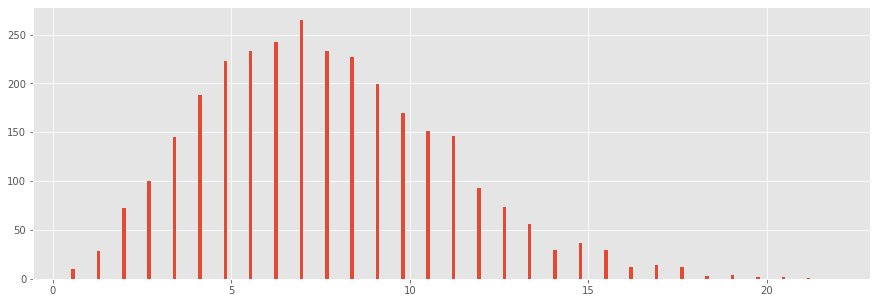

In [16]:
def Maxwell(n,lambd = 1):
    x = [sample_(scale = lambd) for x in range(n)]
    y=[sample_(scale = lambd) for x in range(n)]
    z=[sample_(scale = lambd) for x in range(n)]
    l = []
    #print(x)
    for i in range(n):
        l.append(np.sqrt(x[i]**2+y[i]**2+z[i]**2))
    return l
# Our sample function of N(0,1) using Equation (2)
def sample_(N = 3000,scale = 1):
    return scale*2.0*np.sqrt(N)*(sum(randint(0,1)for x in range(N))/N-0.5)
plt.hist(Maxwell(3000,5),30, width = 0.1)
plt.show()